<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/DevSimExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing DEVSIM results in a Colab Notebook
Source: https://github.com/devsim/devsim/blob/main/examples/plotting/visualization.ipynb

In [ ]:
!pip install -q devsim pyvista panel wurlitzer
!apt install libgl1-mesa-glx xvfb
!wget https://raw.githubusercontent.com/devsim/devsim/35ea1c121da5c8901bf7aef79e101183e1b89a9c/examples/diode/diode_common.py -O diode_common.py
!wget https://raw.githubusercontent.com/devsim/devsim/35ea1c121da5c8901bf7aef79e101183e1b89a9c/examples/diode/gmsh_diode2d.msh
!wget https://raw.githubusercontent.com/devsim/devsim/35ea1c121da5c8901bf7aef79e101183e1b89a9c/examples/diode/gmsh_diode3d.msh

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgl1-mesa-glx is already the newest version (23.0.4-0ubuntu1~22.04.1).
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
--2023-10-15 13:44:19--  https://raw.githubusercontent.com/devsim/devsim/35ea1c121da5c8901bf7aef79e101183e1b89a9c/examples/diode/diode_common.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7420 (7.2K) [text/plain]
Saving to: ‘diode_common.py’

diode_common.py     100%[===================>]   7.25K  --.-KB/s    in 0s      

2023-10-15 13:44:19 (79.9 MB/s) - ‘diode_common.py’ saved [7420/7420]

--2023-10-15 13:44:19--  https://raw.githubusercontent.com/devsim/de

In [ ]:
import devsim
try:
  devsim.delete_mesh(mesh="MyDevice")
except:
  pass
try:
  devsim.delete_mesh(mesh="dio")
except:
  pass
try:
  devsim.delete_device(device="MyDevice")
except:
  pass
try:
  devsim.delete_device(device="diode2d")
except:
  pass
try:
  devsim.delete_mesh(mesh="diode2d")
except:
  pass
try:
  devsim.delete_mesh(mesh="diode3d")
except:
  pass
try:
  devsim.delete_device(device="diode3d")
except:
  pass


# 1D: https://github.com/devsim/devsim/blob/35ea1c121da5c8901bf7aef79e101183e1b89a9c/examples/diode/diode_1d.py

In [ ]:
# Copyright 2013 DEVSIM LLC
#
# SPDX-License-Identifier: Apache-2.0

from devsim import *
import devsim.python_packages.simple_physics as simple_physics
import diode_common
#####
# dio1
#
# Make doping a step function
# print dat to text file for viewing in grace
# verify currents analytically
# in dio2 add recombination
#

device="MyDevice"
region="MyRegion"

diode_common.CreateMesh(device=device, region=region)

diode_common.SetParameters(device=device, region=region)
set_parameter(device=device, region=region, name="taun", value=1e-8)
set_parameter(device=device, region=region, name="taup", value=1e-8)

diode_common.SetNetDoping(device=device, region=region)

print_node_values(device=device, region=region, name="NetDoping")

diode_common.InitialSolution(device, region)

# Initial DC solution
solve(type="dc", absolute_error=1.0, relative_error=1e-10, maximum_iterations=30)

diode_common.DriftDiffusionInitialSolution(device, region)
###
### Drift diffusion simulation at equilibrium
###
solve(type="dc", absolute_error=1e10, relative_error=1e-10, maximum_iterations=30)


####
#### Ramp the bias to 0.5 Volts
####
v = 0.0
while v < 0.51:
    set_parameter(device=device, name=simple_physics.GetContactBiasName("top"), value=v)
    solve(type="dc", absolute_error=1e10, relative_error=1e-10, maximum_iterations=30)
    simple_physics.PrintCurrents(device, "top")
    simple_physics.PrintCurrents(device, "bot")
    v += 0.1

write_devices(file="diode_1d.dat", type="tecplot")

mid
bot
 (region: MyRegion)
 (contact: top)
 (contact: bot)
NetDoping
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.0000

(0.0, 1e-05, 10.0, 1.0000000000000002e+19)

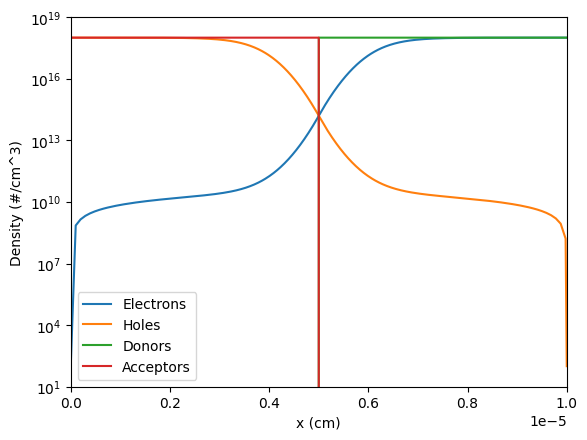

In [ ]:
import matplotlib
import matplotlib.pyplot
x=get_node_model_values(device=device, region=region, name="x")
ymax = 10
ymin = 10
fields = ("Electrons", "Holes", "Donors", "Acceptors")
for i in fields:
   y=get_node_model_values(device=device, region=region, name=i)
   if (max(y) > ymax):
     ymax = max(y)
   matplotlib.pyplot.semilogy(x, y)
matplotlib.pyplot.xlabel('x (cm)')
matplotlib.pyplot.ylabel('Density (#/cm^3)')
matplotlib.pyplot.legend(fields)
ymax *= 10
matplotlib.pyplot.axis([min(x), max(x), ymin, ymax])


(0.0, 1e-05, 0.002952899440463801, 0.02449886375715383)

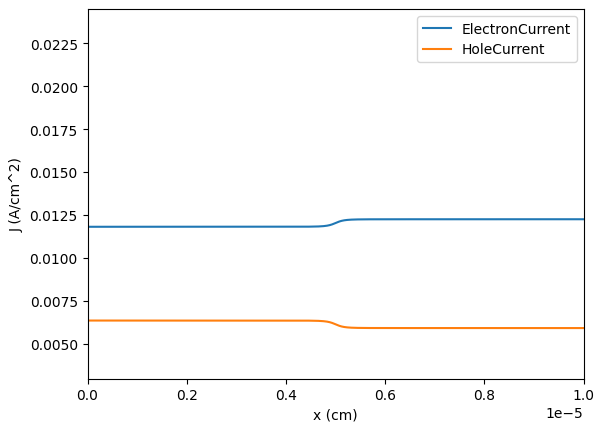

In [ ]:
matplotlib.pyplot.clf()
edge_average_model(device=device, region=region, node_model="x", edge_model="xmid")
xmid=get_edge_model_values(device=device, region=region, name="xmid")
efields = ("ElectronCurrent", "HoleCurrent", )
y=get_edge_model_values(device=device, region=region, name="ElectronCurrent")
ymin=min(y)
ymax=max(y)
for i in efields:
 y=get_edge_model_values(device=device, region=region, name=i)
 if min(y) < ymin:
   ymin = min(y)
 elif max(y) > ymax:
   ymax = max(y)
 matplotlib.pyplot.plot(xmid, y)
matplotlib.pyplot.xlabel('x (cm)')
matplotlib.pyplot.ylabel('J (A/cm^2)')
matplotlib.pyplot.legend(efields)
matplotlib.pyplot.axis([min(x), max(x), 0.5*ymin, 2*ymax])

https://github.com/devsim/devsim/issues/88

# 2D

In [ ]:
# Copyright 2013 DEVSIM LLC
#
# SPDX-License-Identifier: Apache-2.0

from devsim import *
from devsim.python_packages.simple_physics import *
import diode_common

device="diode2d"
region="Bulk"

diode_common.Create2DGmshMesh(device, region)

# this is is the devsim format
write_devices    (file="gmsh_diode2d_out.msh")

diode_common.SetParameters(device=device, region=region)

####
#### NetDoping
####
node_model(device=device, region=region, name="Acceptors", equation="1.0e18*step(0.5e-5-y);")
node_model(device=device, region=region, name="Donors"   , equation="1.0e18*step(y-0.5e-5);")
node_model(device=device, region=region, name="NetDoping", equation="Donors-Acceptors;")

diode_common.InitialSolution(device, region)


####
#### Initial DC solution
####
solve(type="dc", absolute_error=1e100, relative_error=1e-12, maximum_iterations=30)

###
### Drift diffusion simulation at equilibrium
###
diode_common.DriftDiffusionInitialSolution(device, region)

solve(type="dc", absolute_error=1e10, relative_error=1e-10, maximum_iterations=50)

v = 0.0
while v < 0.51:
    set_parameter(device=device, name=GetContactBiasName("top"), value=v)
    solve(type="dc", absolute_error=1e10, relative_error=1e-10, maximum_iterations=30)
    PrintCurrents(device, "top")
    PrintCurrents(device, "bot")
    v += 0.1

write_devices(file="gmsh_diode2d.dat", type="tecplot")
write_devices(file="gmsh_diode2d_dd.msh", type="devsim")


Physical group name Base has 0 Tetrahedra.
Physical group name Base has 0 Triangles.
Physical group name Base has 19 Lines.
Physical group name Base has 20 Points.
Physical group name Bulk has 0 Tetrahedra.
Physical group name Bulk has 922 Triangles.
Physical group name Bulk has 1422 Lines.
Physical group name Bulk has 501 Points.
Physical group name Emitter has 0 Tetrahedra.
Physical group name Emitter has 0 Triangles.
Physical group name Emitter has 20 Lines.
Physical group name Emitter has 21 Points.
Device diode2d has 501 coordinates with max index 501
Region Bulk has 501 nodes.
Contact bot in region Bulk with 21 nodes
Contact top in region Bulk with 20 nodes
number of equations 501
Iteration: 0
  Device: "diode2d"	RelError: 1.00000e+00	AbsError: 8.93836e-02
    Region: "Bulk"	RelError: 1.00000e+00	AbsError: 8.93836e-02
      Equation: "PotentialEquation"	RelError: 1.00000e+00	AbsError: 8.93836e-02
Iteration: 1
  Device: "diode2d"	RelError: 4.91460e-01	AbsError: 8.63816e-02
    Reg

In [ ]:
import pyvista as pv
from wurlitzer import pipes # To suppress some vtk output

In [ ]:
pv.start_xvfb()

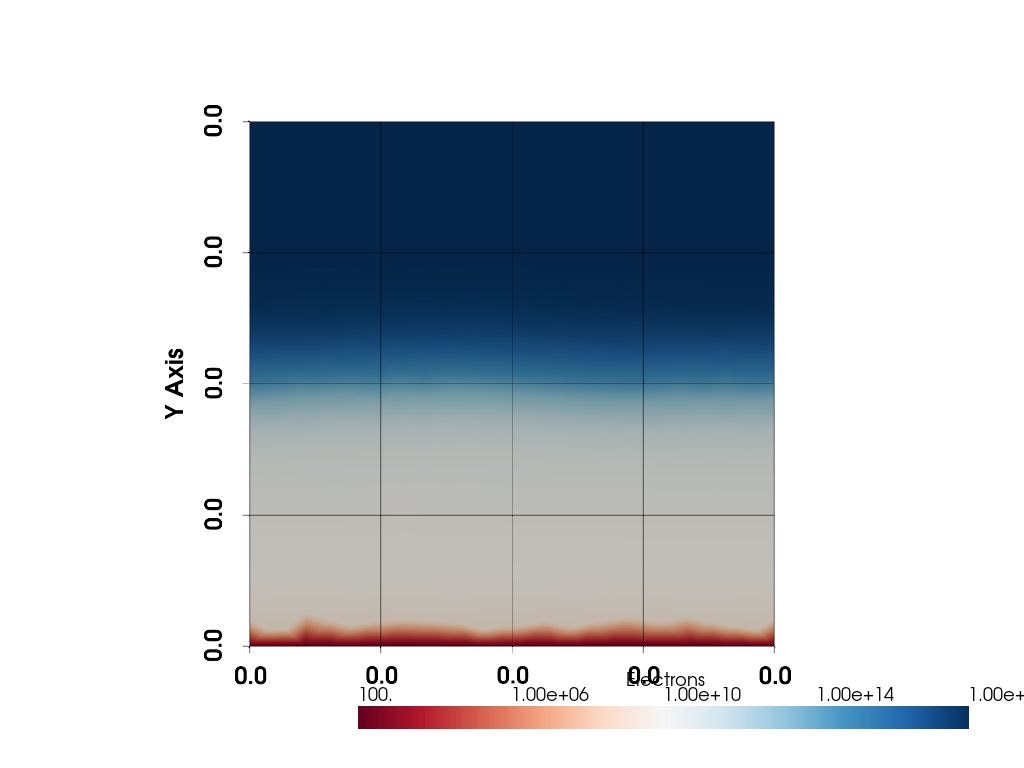

In [ ]:
with pipes() as (out, err):
    reader = pv.get_reader('gmsh_diode2d.dat')
    mesh = reader.read()
    plotter = pv.Plotter(notebook=True)
    _ = plotter.add_mesh(mesh, scalars='Electrons', log_scale=True, cmap='RdBu')
    _ = plotter.show_grid()
    _ = plotter.camera_position = "xy"
    _ = plotter.show(jupyter_backend='panel')

#3D

In [ ]:
# Copyright 2013 DEVSIM LLC
#
# SPDX-License-Identifier: Apache-2.0

from devsim import *
from devsim.python_packages.simple_physics import *
import diode_common

device="diode3d"
region="Bulk"


diode_common.Create3DGmshMesh(device, region)

# this is is the devsim format
write_devices (file="gmsh_diode3d_out.msh")

diode_common.SetParameters(device=device, region=region)

####
#### NetDoping
####
node_model(device=device, region=region, name="Acceptors", equation="1.0e18*step(0.5e-5-z);")
node_model(device=device, region=region, name="Donors",    equation="1.0e18*step(z-0.5e-5);")
node_model(device=device, region=region, name="NetDoping", equation="Donors-Acceptors;")

diode_common.InitialSolution(device, region)


####
#### Initial DC solution
####
solve(type="dc", absolute_error=1e100, relative_error=1e-8, maximum_iterations=100)

###
### Drift diffusion simulation at equilibrium
###
diode_common.DriftDiffusionInitialSolution(device, region)

solve(type="dc", absolute_error=1e10, relative_error=1e-8, maximum_iterations=50)

v = 0.1
while v < 0.51:
    set_parameter(device=device, name=GetContactBiasName("top"), value=v)
    solve(type="dc", absolute_error=1e10, relative_error=1e-8, maximum_iterations=30)
    PrintCurrents(device, "top")
    PrintCurrents(device, "bot")
    v += 0.1

element_from_edge_model(edge_model="ElectricField",   device=device, region=region)
element_from_edge_model(edge_model="ElectronCurrent", device=device, region=region)
element_from_edge_model(edge_model="HoleCurrent",     device=device, region=region)

write_devices(file="gmsh_diode3d_dd.dat", type="devsim")
write_devices(file="gmsh_diode3d_dd.msh", type="devsim")

#element_from_node_model(node_model="node_index", device=device, region=region)
#en0 = map(lambda x : int(x), get_element_model_values(name="node_index@en0", device=device, region=region))
#en1 = map(lambda x : int(x), get_element_model_values(name="node_index@en1", device=device, region=region))
#en2 = map(lambda x : int(x), get_element_model_values(name="node_index@en2", device=device, region=region))
#en3 = map(lambda x : int(x), get_element_model_values(name="node_index@en3", device=device, region=region))
#for i in range(len(en0)):
#  print "%d %d %d %d" % (en0[i], en1[i], en2[i], en3[i])


Physical group name Base has 0 Tetrahedra.
Physical group name Base has 223 Triangles.
Physical group name Base has 354 Lines.
Physical group name Base has 132 Points.
Physical group name Bulk has 6701 Tetrahedra.
Physical group name Bulk has 14066 Triangles.
Physical group name Bulk has 8781 Lines.
Physical group name Bulk has 1417 Points.
Physical group name Emitter has 0 Tetrahedra.
Physical group name Emitter has 201 Triangles.
Physical group name Emitter has 320 Lines.
Physical group name Emitter has 120 Points.
Device diode3d has 1417 coordinates with max index 1417
Region Bulk has 1417 nodes.
Contact bot in region Bulk with 120 nodes
Contact top in region Bulk with 132 nodes
number of equations 1417
Iteration: 0
  Device: "diode3d"	RelError: 1.00000e+00	AbsError: 8.97349e-02
    Region: "Bulk"	RelError: 1.00000e+00	AbsError: 8.97349e-02
      Equation: "PotentialEquation"	RelError: 1.00000e+00	AbsError: 8.97349e-02
Iteration: 1
  Device: "diode3d"	RelError: 4.91582e-01	AbsError:

In [ ]:
with pipes() as (out, err):
    reader = pv.get_reader('gmsh_diode3d_dd.dat')
    mesh = reader.read()
    plotter = pv.Plotter(notebook=True)
    _ = plotter.add_mesh(mesh, scalars='Electrons', log_scale=True, cmap='RdBu')
    _ = plotter.show_grid()
    _ = plotter.show(jupyter_backend='panel')

ERROR:root:gmsh_diode3d_dd.dat: The record type BEGIN_DEVICE found in the file is unknown.


KeyError: ignored